### Wavefrom Generator
#### Python functions that generate sound

In [2]:
import numpy as np
import soundfile as sf
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def sinewave(fs,duration,f0,phase):
    
    time_vector = np.arange(0,duration,1/fs)
    signal = np.array(1 * np.sin (2*np.pi*f0*time_vector+phase))
    return  time_vector,signal

In [4]:
def cosinewave(fs,duration,f0, phase):
    time_vector = np.arange(0,duration,1/fs)
    signal = np.array(1 * np.sin (2*np.pi*f0*time_vector+(np.pi/2)))

    return time_vector, signal

In [5]:
def squarewave(fs,duration,f0,number_overtones,phase):
    #Create placeholder array to capture values. Loop only returns one value at a time so we need to capture values.
    odd_overtones = np.arange(1,number_overtones*2,2)
    time_vector = np.arange(0,duration,1/fs)
    signal = np.zeros(len(time_vector))
    for k in odd_overtones:
        signal = signal+(1/k)*np.sin(time_vector*k*2*np.pi*f0+phase)
        
    return time_vector,signal

In [6]:
def triangularwave(fs,duration,f0,number_overtones,phase):
    odd_overtones = np.arange(1,number_overtones*2,2)
    time_vector = np.arange(0,duration,1/fs)
    signal = np.zeros(len(time_vector))
    for k in odd_overtones:
        signal = signal+(-1)**(k-1)/2*(1/k**2)*np.sin(k*2*np.pi*f0*time_vector+phase)
    return time_vector, signal 

In [7]:
def sawtoothwave(fs,duration,f0,number_overtones,phase):
    all_overtones = np.arange(1,number_overtones)
    time_vector = np.arange(0,duration,1/fs)
    signal = np.zeros(len(time_vector))
    for k in all_overtones:
        signal = signal-(1/k)*np.sin(time_vector*k*2*np.pi*f0+phase)

    return time_vector, signal

Plot and playback wavforms

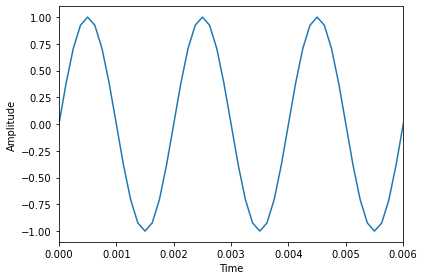

In [20]:
fs,duration,f0,phase = (8000,5,500,0)

x,y = sinewave(fs,duration,f0,phase)

t_limit= (3/f0) # How many cycles of the signal

plt.plot(x,y)
plt.xlim(0,t_limit)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
Audio(y,rate=8000)

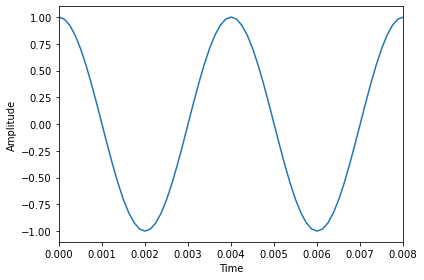

In [9]:
fs,duration,f0,phase = (8000,3,250,0)
x,y = cosinewave(fs,duration,f0,phase)

t_limit= (2/f0)
plt.plot(x,y)
plt.xlim(0,t_limit)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
Audio(y,rate=8000)

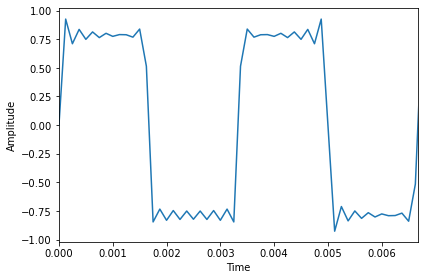

In [10]:
fs,duration,f0,number_overtones,phase = (8000,5,300,7,0)
x,y = squarewave(fs,duration,f0,number_overtones,phase)

t_limit= (2/f0)
plt.plot(x,y)
plt.xlim(0,t_limit)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
Audio(y,rate=8000)

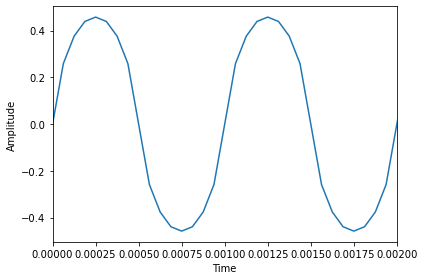

In [17]:
fs,duration,f0,number_overtones,phase = (16000,5,1000,12,0)
x,y = triangularwave(fs,duration,f0,number_overtones,phase)

t_limit= (2/f0)
plt.plot(x,y)
plt.xlim(0,t_limit)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
Audio(y,rate=8000)

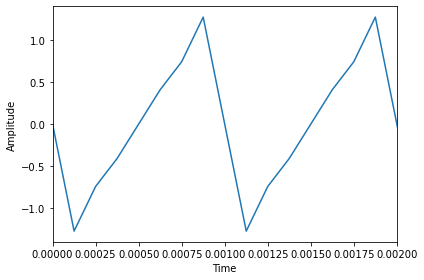

In [12]:
fs,duration,f0,number_overtones,phase = (8000,5,1000,12,0)
x,y = sawtoothwave(fs,duration,f0,number_overtones,phase)

t_limit= (2/f0)
plt.plot(x,y)
plt.xlim(0,t_limit)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
Audio(y,rate=8000)

Random Noise Generator


In [13]:
def noise_gen(fs,duration):
    time_vector = np.arange(0,duration,1/fs)
    signal = np.random.randn(fs*duration) # Bell curve distribution 
    scaling = np.amax(np.abs(signal)) # compression to put into -1 and 1. Pulls loudest sound of array  and divides it against it
    signal = signal/scaling #divided by maximum value of signal
    return time_vector, signal

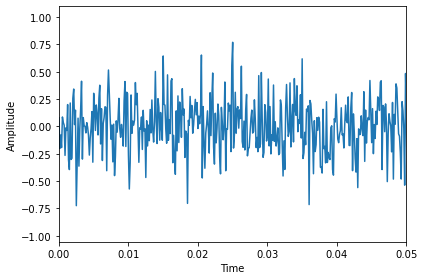

In [14]:
fs,duration= (8000,5)
x,y = noise_gen(fs,duration)

plt.plot(x,y)
plt.xlim(0,0.05)


plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()